In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
dataset = pd.read_csv('C:/Users/dalvi/OneDrive/Desktop/Indiancropsd.csv')
dataset

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Rainfall..mm.,Soil Ph Level,high Temp,low Temp,MeanTemperature,Air humidity
0,Maharashtra,SOLAPUR,2008,Kharif,Sugarcane,117500,9954400,84.72,916.9,2,40,14,26,59
1,Maharashtra,SOLAPUR,2008,Whole Year,Sugarcane,117500,9954400,84.72,916.9,2,40,14,26,59
2,Maharashtra,SOLAPUR,2009,Kharif,Sugarcane,107300,9932600,92.57,941.7,2,40,14,26,59
3,Uttar Pradesh,SITAPUR,2014,Kharif,Sugarcane,148655,9903396,66.62,486.9,1,43,38,32,71
4,Maharashtra,KOLHAPUR,2009,Kharif,Sugarcane,112700,9810000,87.05,941.7,2,36,13,24,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41403,West Bengal,COOCHBEHAR,2011,Summer,Moong(Green Gram),167,100,0.60,2418.7,0,34,29,26,77
41404,West Bengal,MURSHIDABAD,2013,Rabi,Arhar/Tur,69,100,1.45,2406.1,2,35,11,26,77
41405,West Bengal,24 PARAGANAS SOUTH,2014,Rabi,Linseed,208,100,0.48,2322.6,1,36,13,27,75
41406,West Bengal,COOCHBEHAR,2014,Summer,Sesamum,148,100,0.68,2322.6,0,34,29,26,77


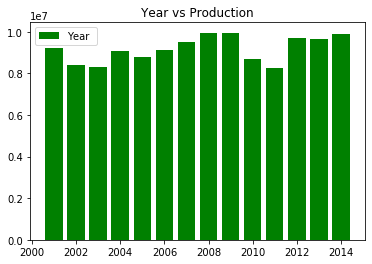

In [3]:
#plotting of production
x_axis=dataset.Crop_Year
y1_axis=dataset.Production
plt.bar(x_axis,y1_axis,color='green')
plt.title("Year vs Production")
plt.legend(["Year ","Production"])
plt.show()

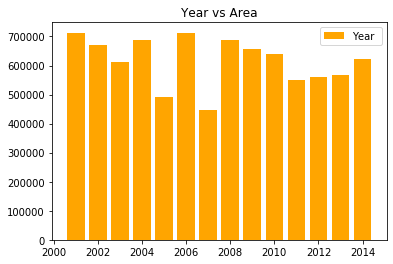

In [4]:
#plotting of Area
x_axis=dataset.Crop_Year
y1_axis=dataset.Area
plt.bar(x_axis,y1_axis,color='orange')
plt.title("Year vs Area")
plt.legend(["Year ","Area"])
plt.show()

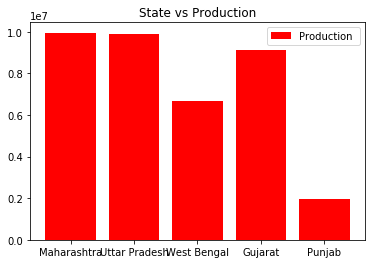

In [5]:
#plotting of Area
x_axis=dataset.State_Name
y1_axis=dataset.Production
plt.bar(x_axis,y1_axis,color='red')
plt.title("State vs Production")
plt.legend(["Production ","Crops"])
plt.show()

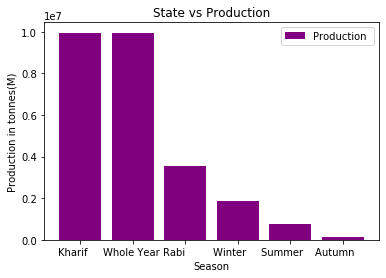

In [6]:
#plotting of Area
x_axis=dataset.Season
y1_axis=dataset.Production
plt.bar(x_axis,y1_axis,color='purple')
plt.xlabel("Season")
plt.ylabel("Production in tonnes(M)")
plt.title("State vs Production")
plt.legend(["Production ","Crops"])
plt.show()

In [3]:
feature_cols = ['Crop_Year','Area','Production','Rainfall..mm.','Soil Ph Level','high Temp','low Temp','MeanTemperature','Air humidity']
#feature_cols = ['Area','Production','Rainfall..mm.']
x = dataset[feature_cols] # Features
y = dataset.Yield # Target variable

In [4]:
#Splitting the dataset into 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)


In [5]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gd.fit(x_train, y_train)

#pred_train_gd=gd.predict(x_train)
#train_error_gd = np.sqrt(mean_squared_error(y_train,pred_train_gd))
#print("Train RMSE:",train_error_gd)
#train_acc_gd = r2_score(y_train, pred_train_gd)
#print("Train R-square :",train_acc_gd)

pred_test_gd=gd.predict(x_test)
test_mae_gd = metrics.mean_absolute_error(y_test,pred_test_gd)
print('Test MAE:',test_mae_gd)
test_mse_gd = metrics.mean_squared_error(y_test,pred_test_gd)
print('Test MSE:', test_mse_gd)
test_error_gd = np.sqrt(mean_squared_error(y_test,pred_test_gd))
print("Test RMSE:",test_error_gd)
test_acc_gd = r2_score(y_test, pred_test_gd)
print("Test R-square:",test_acc_gd)

cvr = cross_val_predict(gd,x_train,y_train,cv=10)
acc_gd = metrics.r2_score(y_train,cvr)
acc_rmse = np.sqrt(mean_squared_error(y_train,cvr))
print("Cross validation RMSE:",acc_rmse)
print("Cross validation accuracy:",acc_gd)

Test MAE: 23.72387739841202
Test MSE: 467646.5200153326
Test RMSE: 683.8468542117691
Test R-square: 0.7962901743309185
Cross validation RMSE: 471.7030035375314
Cross validation accuracy: 0.8728444565576918


In [6]:
#Ridge Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

#pred_train_rr= rr.predict(x_train)
#train_error_rr = np.sqrt(mean_squared_error(y_train,pred_train_rr))
#print("Train RMSE:",train_error_rr )
#train_acc_rr = r2_score(y_train, pred_train_rr)
#print("Train R-square :", train_acc_rr)

pred_test_rr= rr.predict(x_test)
test_mae_rr = metrics.mean_absolute_error(y_test,pred_test_rr)
print('Test MAE:',test_mae_rr)
test_mse_rr = metrics.mean_squared_error(y_test,pred_test_rr)
print('Test MSE:', test_mse_rr)
test_error_rr = np.sqrt(mean_squared_error(y_test,pred_test_rr))
print("Test RMSE: ", test_error_rr) 
test_acc_rr = r2_score(y_test, pred_test_rr)
print("Test R-square:",test_acc_rr)


cvr = cross_val_predict(rr,x_train,y_train,cv=10)
acc_rr = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_rr)

Test MAE: 83.37190994342495
Test MSE: 2289880.475434965
Test RMSE:  1513.235102498936
Test R-square: 0.0025133674926185456
Cross validation accuracy: 0.0012197073141353432


In [7]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300,random_state=0)
rf.fit(x_train,y_train)

#pred_train_rf=rf.predict(x_train)
#train_error_rf = np.sqrt(mean_squared_error(y_train,pred_train_rf))
#print("Train RMSE:",train_error_rf)
#train_acc_rf = r2_score(y_train, pred_train_rf)
#print("Train R-square :",train_acc_rf)



pred_test_rf=rf.predict(x_test)
test_mae_rf = metrics.mean_absolute_error(y_test,pred_test_rf)
print('Test MAE:',test_mae_rf)
test_mse_rf = metrics.mean_squared_error(y_test,pred_test_rf)
print('Test MSE:', test_mse_rf)
test_error_rf = np.sqrt(mean_squared_error(y_test,pred_test_rf))
print("Test RMSE:", test_error_rf)
test_acc_rf = r2_score(y_test, pred_test_rf)
print("Test R-square:",test_acc_rf)


cvr = cross_val_predict(rf,x_train,y_train,cv=10)
acc_rf = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_rf) 



Test MAE: 19.437880702460475
Test MSE: 777115.9724390944
Test RMSE: 881.5418154796143
Test R-square: 0.6614832945511147
Cross validation accuracy: 0.7675362692486207


In [15]:
#Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

#pred_train_dt=dt.predict(x_train)
#train_error_dt = np.sqrt(mean_squared_error(y_train,pred_train_dt))
#print("Train RMSE:", train_error_dt)
#train_acc_dt = r2_score(y_train, pred_train_dt)
#print("Train R-square :",train_acc_dt)


pred_test_dt=dt.predict(x_test)
test_mae_dt = metrics.mean_absolute_error(y_test,pred_test_dt)
print('Test MAE:',test_mae_dt)
test_mse_dt = metrics.mean_squared_error(y_test,pred_test_dt)
print('Test MSE:', test_mse_dt)
test_error_dt = np.sqrt(mean_squared_error(y_test,pred_test_dt))
print("Test RMSE:", test_error_dt)
test_acc_dt = r2_score(y_test, pred_test_dt)
print("Test R-square:", test_acc_dt)


cvr = cross_val_predict(dt,x_train,y_train,cv=10)
acc_dt = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_dt)

Test MAE: 11.846046848587298
Test MSE: 423938.07967840304
Test RMSE: 651.1052754189625
Test R-square: 0.8153298514806843
Cross validation accuracy: 0.728518895216477


In [16]:
lr = LinearRegression()
lr.fit(x_train, y_train)

#pred_train_lr=lr.predict(x_train)
#train_error_lr = np.sqrt(mean_squared_error(y_train,pred_train_lr))
#print("Train RMSE:",train_error_lr)
#train_acc_lr = r2_score(y_train, pred_train_lr)
#print("Train R-square :",train_acc_lr)



pred_test_lr=lr.predict(x_test)
test_mae_lr = metrics.mean_absolute_error(y_test,pred_test_lr)
print('Test MAE:',test_mae_lr)
test_mse_lr = metrics.mean_squared_error(y_test,pred_test_lr)
print('Test MSE:', test_mse_lr)
test_error_lr = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print("Test RMSE:", test_error_lr)
test_acc_lr = r2_score(y_test, pred_test_lr)
print("Test R-square:",test_acc_lr)


cvr = cross_val_predict(lr,x_train,y_train,cv=10)
acc_lr = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_lr)

Test MAE: 83.37191440846037
Test MSE: 2289880.4755220474
Test RMSE: 1513.2351025277094
Test R-square: 0.0025133674546847784
Cross validation accuracy: 0.001219707260710079


In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
xtrainpoly = poly.fit_transform(x_train)
pm = LinearRegression()
pm.fit(xtrainpoly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
testpred = pm.predict(poly.fit_transform(x_test))
mae_test = metrics.mean_absolute_error(y_test,testpred)
print('Test MAE:',mae_test)
mse_test = metrics.mean_squared_error(y_test,testpred)
print('Test MSE:', mse_test)
rmse_test = np.sqrt(mean_squared_error(y_test, testpred))
r2_test = r2_score(y_test, testpred)
print("Test RMSE:",rmse_test)
print("Test R-square",r2_test)

cvr = cross_val_predict(pm,x_train,y_train,cv=10)
acc_pl = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_pl)

Test MAE: 142.16921074380727
Test MSE: 2236684.527687882
Test RMSE: 1495.5549229927606
Test R-square 0.025685863765026462
Cross validation accuracy: 0.001219707260710079


In [19]:
MAE=[test_mae_gd,test_mae_rr,test_mae_rf,test_mae_dt,test_mae_lr,mae_test]
MSE=[test_mse_gd,test_mse_rr,test_mse_rf,test_mse_dt,test_mse_lr,mse_test]
RMSE=[test_error_gd,test_error_rr,test_error_rf,test_error_dt,test_error_lr,rmse_test]
RS=[test_acc_gd,test_acc_rr,test_acc_rf,test_acc_dt,test_acc_lr, r2_test]
cv=[acc_gd,acc_rr,acc_rf,acc_dt,acc_lr, acc_pl]
col={'Test MAE': MAE,'Test MSE': MSE,'Test RMSE': RMSE, 'Test R-Square': RS,'CrossValidation': cv}
models=['Gradient Boosting Regressor','Ridge Regression', 'Random Forest Regressor','Decision Tree Regressor','Linear Regression','Polynomial Regression']
df1 = pd.DataFrame(data=col , index=models)
df1

,Test MAE,Test MSE,Test RMSE,Test R-Square,CrossValidation
Gradient Boosting Regressor,23.723877,4.676465e+05,683.846854,0.796290,0.872844
Ridge Regression,83.371910,2.289880e+06,1513.235102,0.002513,0.001220
Random Forest Regressor,19.437881,7.771160e+05,881.541815,0.661483,0.767536
Decision Tree Regressor,11.846047,4.239381e+05,651.105275,0.815330,0.728519
Linear Regression,83.371914,2.289880e+06,1513.235103,0.002513,0.001220
Polynomial Regression,142.169211,2.236685e+06,1495.554923,0.025686,0.001220


In [33]:
df1.to_csv('YieldResult.csv')

In [21]:
feature_cols = ['Crop_Year','Area','Yield','Rainfall..mm.','Soil Ph Level','high Temp','low Temp','MeanTemperature','Air humidity']
x = dataset[feature_cols] # Features
y = dataset.Production # Target variable

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [23]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gd = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=0)
gd.fit(x_train, y_train)

#pred_train_gd=gd.predict(x_train)
#train_error_gd = np.sqrt(mean_squared_error(y_train,pred_train_gd))
#print("Train RMSE:",train_error_gd)
#train_acc_gd = r2_score(y_train, pred_train_gd)
#print("Train R-square :",train_acc_gd)

pred_test_gd=gd.predict(x_test)
test_mae_gd = metrics.mean_absolute_error(y_test,pred_test_gd)
print('Test MAE:',test_mae_gd)
test_mse_gd = metrics.mean_squared_error(y_test,pred_test_gd)
print('Test MSE:', test_mse_gd)
test_error_gd = np.sqrt(mean_squared_error(y_test,pred_test_gd))
print("Test RMSE:",test_error_gd)
test_acc_gd = r2_score(y_test, pred_test_gd)
print("Test R-square:",test_acc_gd)

cvr = cross_val_predict(gd,x_train,y_train,cv=10)
acc_gd = metrics.r2_score(y_train,cvr)
#acc_rmse = np.sqrt(mean_squared_error(y_train,cvr))
#print("Cross validation RMSE:",acc_rmse)
print("Cross validation accuracy:",acc_gd)

Test MAE: 33085.36868419011
Test MSE: 13785989928.73461
Test RMSE: 117413.75527907541
Test R-square: 0.9378924424709497
Cross validation accuracy: 0.9402892011577452


In [24]:
#Ridge Regression
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 

#pred_train_rr= rr.predict(x_train)
#train_error_rr = np.sqrt(mean_squared_error(y_train,pred_train_rr))
#print("Train RMSE:",train_error_rr )
#train_acc_rr = r2_score(y_train, pred_train_rr)
#print("Train R-square :", train_acc_rr)

pred_test_rr= rr.predict(x_test)
test_mae_rr = metrics.mean_absolute_error(y_test,pred_test_rr)
print('Test MAE:',test_mae_rr)
test_mse_rr = metrics.mean_squared_error(y_test,pred_test_rr)
print('Test MSE:', test_mse_rr)
test_error_rr = np.sqrt(mean_squared_error(y_test,pred_test_rr))
print("Test RMSE: ", test_error_rr) 
test_acc_rr = r2_score(y_test, pred_test_rr)
print("Test R-square:",test_acc_rr)


cvr = cross_val_predict(rr,x_train,y_train,cv=10)
acc_rr = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_rr)

Test MAE: 110728.21085525221
Test MSE: 196122686603.28885
Test RMSE:  442857.4111418808
Test R-square: 0.11644349778777896
Cross validation accuracy: 0.10971721728936357


In [25]:
#Random Forest Regressor
rf = RandomForestRegressor(n_estimators=300,random_state=0)
rf.fit(x_train,y_train)

#pred_train_rf=rf.predict(x_train)
#train_error_rf = np.sqrt(mean_squared_error(y_train,pred_train_rf))
#print("Train RMSE:",train_error_rf)
#train_acc_rf = r2_score(y_train, pred_train_rf)
#print("Train R-square :",train_acc_rf)



pred_test_rf=rf.predict(x_test)
test_mae_rf = metrics.mean_absolute_error(y_test,pred_test_rf)
print('Test MAE:',test_mae_rf)
test_mse_rf = metrics.mean_squared_error(y_test,pred_test_rf)
print('Test MSE:', test_mse_rf)
test_error_rf = np.sqrt(mean_squared_error(y_test,pred_test_rf))
print("Test RMSE:", test_error_rf)
test_acc_rf = r2_score(y_test, pred_test_rf)
print("Test R-square:",test_acc_rf)


cvr = cross_val_predict(rf,x_train,y_train,cv=10)
acc_rf = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_rf)



Test MAE: 3560.0274445249406
Test MSE: 1076494111.785776
Test RMSE: 32809.96970107982
Test R-square: 0.9951502633961697
Cross validation accuracy: 0.989678093101782


In [26]:
#Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

#pred_train_dt=dt.predict(x_train)
#train_error_dt = np.sqrt(mean_squared_error(y_train,pred_train_dt))
#print("Train RMSE:", train_error_dt)
#train_acc_dt = r2_score(y_train, pred_train_dt)
#print("Train R-square :",train_acc_dt)


pred_test_dt=dt.predict(x_test)
test_mae_dt = metrics.mean_absolute_error(y_test,pred_test_dt)
print('Test MAE:',test_mae_dt)
test_mse_dt = metrics.mean_squared_error(y_test,pred_test_dt)
print('Test MSE:', test_mse_dt)
test_error_dt = np.sqrt(mean_squared_error(y_test,pred_test_dt))
print("Test RMSE:", test_error_dt)
test_acc_dt = r2_score(y_test, pred_test_dt)
print("Test R-square:", test_acc_dt)


cvr = cross_val_predict(dt,x_train,y_train,cv=10)
acc_dt = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_dt)

Test MAE: 5789.73508814296
Test MSE: 1669599705.4578605
Test RMSE: 40860.735498248934
Test R-square: 0.9924782507245943
Cross validation accuracy: 0.9847234979021244


In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

#pred_train_lr=lr.predict(x_train)
#train_error_lr = np.sqrt(mean_squared_error(y_train,pred_train_lr))
#print("Train RMSE:",train_error_lr)
#train_acc_lr = r2_score(y_train, pred_train_lr)
#print("Train R-square :",train_acc_lr)



pred_test_lr=lr.predict(x_test)
test_mae_lr = metrics.mean_absolute_error(y_test,pred_test_lr)
print('Test MAE:',test_mae_lr)
test_mse_lr = metrics.mean_squared_error(y_test,pred_test_lr)
print('Test MSE:', test_mse_lr)
test_error_lr = np.sqrt(mean_squared_error(y_test,pred_test_lr))
print("Test RMSE:", test_error_lr)
test_acc_lr = r2_score(y_test, pred_test_lr)
print("Test R-square:",test_acc_lr)


cvr = cross_val_predict(lr,x_train,y_train,cv=10)
acc_lr = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_lr)

Test MAE: 110728.21144361267
Test MSE: 196122686714.2522
Test RMSE: 442857.41126716195
Test R-square: 0.11644349728787562
Cross validation accuracy: 0.10971721725028838


In [28]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=5)
xtrainpoly = poly.fit_transform(x_train)
pm = LinearRegression()
pm.fit(xtrainpoly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
testpred = pm.predict(poly.fit_transform(x_test))
mae_test = metrics.mean_absolute_error(y_test,testpred)
print('Test MAE:',mae_test)
mse_test = metrics.mean_squared_error(y_test,testpred)
print('Test MSE:', mse_test)
rmse_test = np.sqrt(mean_squared_error(y_test, testpred))
r2_test = r2_score(y_test, testpred)
print("Test RMSE:",rmse_test)
print("Test R-square",r2_test)

cvr = cross_val_predict(pm,x_train,y_train,cv=10)
acc_pl = metrics.r2_score(y_train,cvr)
print("Cross validation accuracy:",acc_pl)

Test MAE: 2607.922249804022
Test MSE: 16222228026.926811
Test RMSE: 127366.51061769263
Test R-square 0.9269168942063628
Cross validation accuracy: 0.10971721725028838


In [30]:
MAE=[test_mae_gd,test_mae_rr,test_mae_rf,test_mae_dt,test_mae_lr,mae_test]
MSE=[test_mse_gd,test_mse_rr,test_mse_rf,test_mse_dt,test_mse_lr,mse_test]
RMSE=[test_error_gd,test_error_rr,test_error_rf,test_error_dt,test_error_lr,rmse_test]
RS=[test_acc_gd,test_acc_rr,test_acc_rf,test_acc_dt,test_acc_lr,r2_test]
cv=[acc_gd,acc_rr,acc_rf,acc_dt,acc_lr,acc_pl]
col={'Test MAE': MAE,'Test MSE': MSE,'Test RMSE': RMSE, 'Test R-Square': RS,'CrossValidation': cv}
models=['Gradient Boosting Regressor','Ridge Regression', 'Random Forest Regressor','Decision Tree Regressor','Linear Regression','Polynomial Regression']
df = pd.DataFrame(data=col , index=models)
df

,Test MAE,Test MSE,Test RMSE,Test R-Square,CrossValidation
Gradient Boosting Regressor,33085.368684,1.378599e+10,117413.755279,0.937892,0.940289
Ridge Regression,110728.210855,1.961227e+11,442857.411142,0.116443,0.109717
Random Forest Regressor,3560.027445,1.076494e+09,32809.969701,0.995150,0.989678
Decision Tree Regressor,5789.735088,1.669600e+09,40860.735498,0.992478,0.984723
Linear Regression,110728.211444,1.961227e+11,442857.411267,0.116443,0.109717
Polynomial Regression,2607.922250,1.622223e+10,127366.510618,0.926917,0.109717


In [32]:
df.to_csv('ProductionResult.csv')